In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return data

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

('Dimensions: ', (100, 3))
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


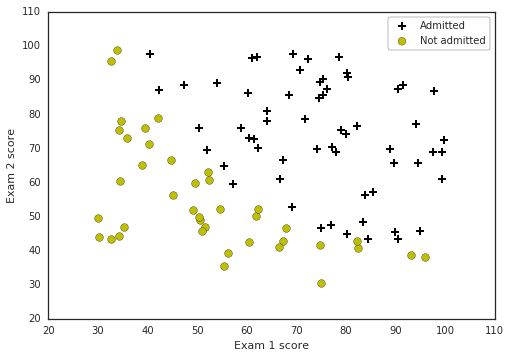

In [22]:
data = loaddata('ex2data1.txt', ',')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

#feed the data into numpy matrix 
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

## Logistic regression

$h_{\theta}(x) = g(\theta^{T}x)$

$g(z)=\frac{1}{1+e^{−z}}$

In [23]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

cost function 
$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$

vectorization form
$J(\theta) = \frac{1}{m}\big(-y^T(\,log\,(g(X\theta))-(1-y^T)(\,log\,(1-g(X\theta))\big)$


In [24]:
def costFunction(theta, X, y):
    m = y.size
    hx = sigmoid(X.dot(theta))
    
    J = -1/m * (y.T.dot(np.log(hx))+(1-y.T).dot(np.log(1-hx)))
#     J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))           
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])